In [1]:
import pandas as pd

df=pd.read_csv("processed.cleveland.data",names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')
mean_value=df['thal'].mean()
df.fillna(value=mean_value,inplace=True)
df.isnull().sum()
df['ca'] = pd.to_numeric(df['ca'],errors='coerce')

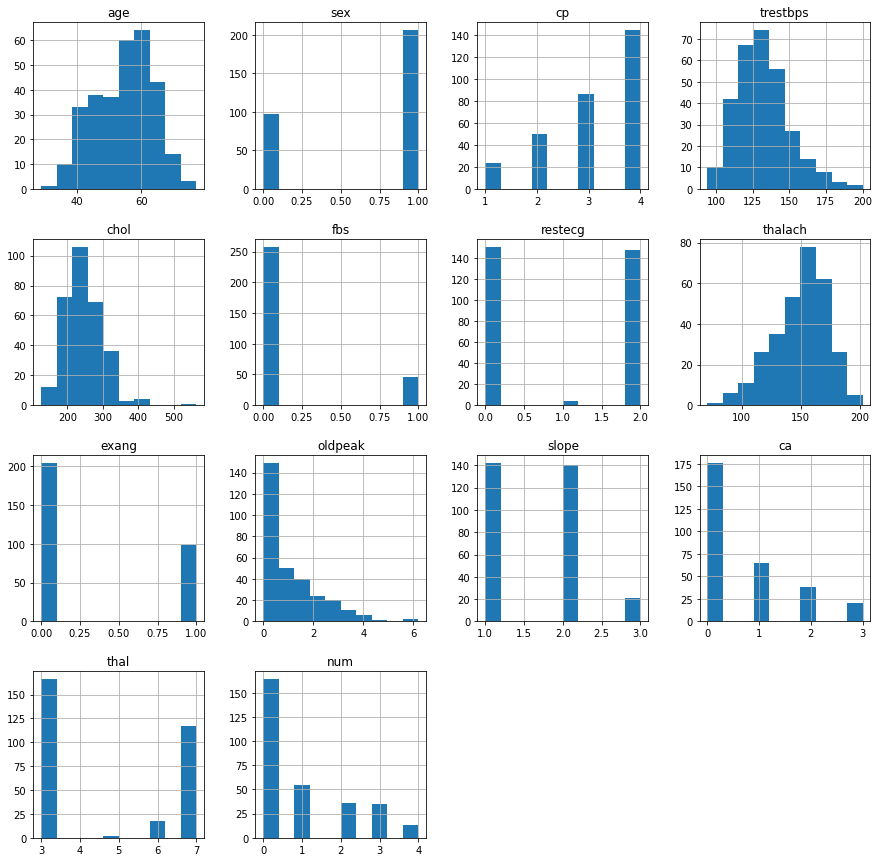

In [8]:
df.hist(figsize=(15,15))
plt.show()

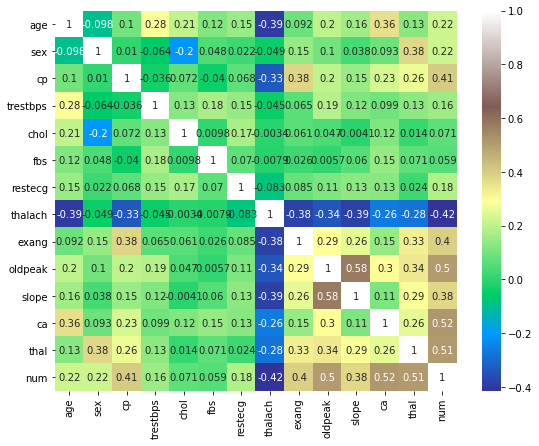

In [9]:
numeric_columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0)
fig=plt.gcf()
fig.set_size_inches(9,7)
plt.show()

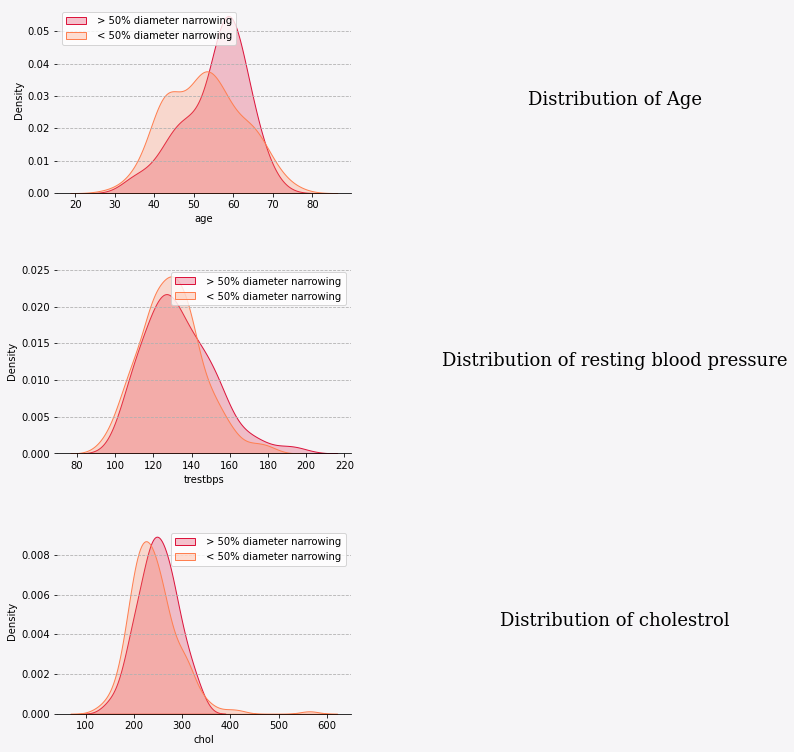

In [10]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
sns.kdeplot(ax=ax0,x=df.loc[df['num']==1]['age'],color='crimson',label=' > 50% diameter narrowing',shade=True)
sns.kdeplot(ax=ax0,x=df.loc[df['num']==0]['age'],color='coral',label=' < 50% diameter narrowing',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distribution of Age',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=df.loc[df['num']==1]['trestbps'],color='crimson',label=' > 50% diameter narrowing',shade=True)
sns.kdeplot(ax=ax2,x=df.loc[df['num']==0]['trestbps'],color='coral',label=' < 50% diameter narrowing',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distribution of resting blood pressure',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=df.loc[df['num']==1]['chol'],color='crimson',label=' > 50% diameter narrowing',shade=True)
sns.kdeplot(ax=ax4,x=df.loc[df['num']==0]['chol'],color='coral',label=' < 50% diameter narrowing',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,'Distribution of cholestrol',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

C:\Users\sloga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sloga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sloga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sloga\anaconda3\lib\si

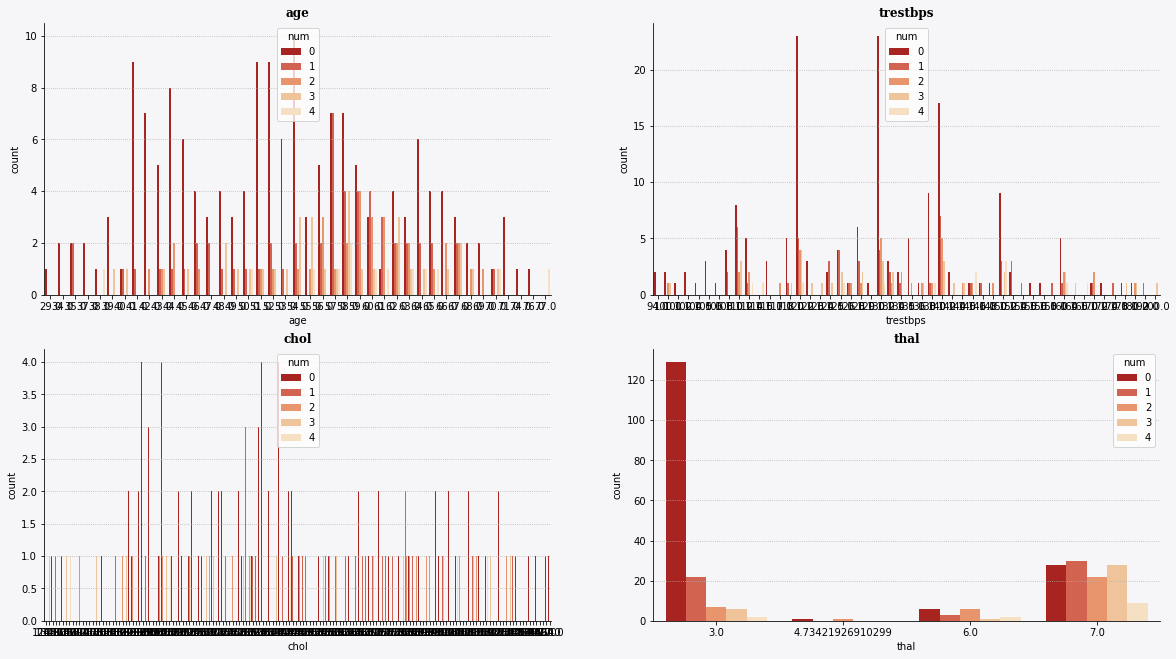

In [11]:

data_cat=df[['age','trestbps','chol','thal']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='OrRd_r',hue=df['num'])

# OUTLIER REMOVATION

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'cp'),
  Text(4, 0, 'trestbps'),
  Text(5, 0, 'chol'),
  Text(6, 0, 'fbs'),
  Text(7, 0, 'restecg'),
  Text(8, 0, 'thalach'),
  Text(9, 0, 'exang'),
  Text(10, 0, 'oldpeak'),
  Text(11, 0, 'slope'),
  Text(12, 0, 'ca'),
  Text(13, 0, 'thal'),
  Text(14, 0, 'num')])

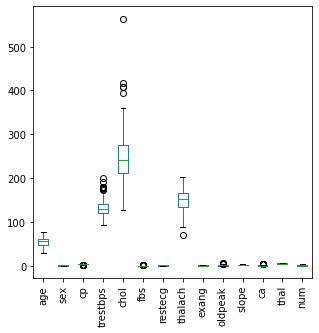

In [13]:
df.plot(kind='box')
plt.xticks(rotation=90)

In [14]:
df['chol'].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [15]:
df[df['chol']>275.000000]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
11,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
21,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2
276,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0,0
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4


# LABEL ENCODING

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [17]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [19]:
ca=enc.fit_transform(df['ca'])

In [20]:
thal=enc.fit_transform(df['thal'])

In [21]:
df['ca']=ca

In [22]:
df['thal']=thal

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,2,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,3,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0,3,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2,3,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1,3,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 33.3 KB


# SPLITTING THE DATA INTO TEST AND TRAIN

In [25]:
#X ---train_X,test_X 70/30

#Y ---train_Y,test_Y



In [26]:
X=df.drop('num',axis=1)

In [27]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,2
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,3
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0


In [28]:
Y=df['num']

In [29]:
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [31]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53.0,1.0,3.0,130.0,197.0,1.0,2.0,152.0,0.0,1.2,3.0,0,0
171,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0,3
223,53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2,3
58,54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1,0
154,64.0,1.0,4.0,120.0,246.0,0.0,2.0,96.0,1.0,2.2,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,51.0,1.0,4.0,140.0,299.0,0.0,0.0,173.0,1.0,1.6,1.0,0,3
123,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0,3
15,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0,0
125,45.0,0.0,2.0,130.0,234.0,0.0,2.0,175.0,0.0,0.6,2.0,0,0


In [32]:
Y_train

49     0
171    0
223    3
58     0
154    3
      ..
156    1
123    3
15     0
125    0
265    2
Name: num, Length: 212, dtype: int64

In [33]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1,3
183,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0,3
229,66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,1,0
126,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2,3
184,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,0,0
21,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0,0
210,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0,0
78,48.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0,0


In [34]:
Y_test

246    2
183    0
229    2
126    3
184    1
      ..
69     1
21     0
210    0
78     0
174    4
Name: num, Length: 91, dtype: int64

# NORMALISE

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,1.283828,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,1.441567,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000,4.000000


In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [37]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [38]:
X_train_std

array([[-0.15741061,  0.6723502 , -0.1674166 , ...,  2.30461805,
        -0.68338185, -0.89523364],
       [-0.15741061,  0.6723502 ,  0.87647516, ..., -0.90971765,
        -0.68338185,  1.18275393],
       [-0.15741061,  0.6723502 ,  0.87647516, ...,  0.6974502 ,
         1.34286924,  1.18275393],
       ...,
       [ 0.27457709,  0.6723502 , -0.1674166 , ..., -0.90971765,
        -0.68338185, -0.89523364],
       [-1.02138602, -1.48732014, -1.21130837, ...,  0.6974502 ,
        -0.68338185, -0.89523364],
       [-1.34537679,  0.6723502 ,  0.87647516, ...,  0.6974502 ,
        -0.68338185,  0.49009141]])

In [39]:
X_test_std

array([[ 0.38257401,  0.6723502 ,  0.87647516, ..., -0.90971765,
         0.32974369,  1.18275393],
       [ 0.49057094,  0.6723502 , -2.25520014, ...,  2.30461805,
        -0.68338185,  1.18275393],
       [ 1.24654942,  0.6723502 ,  0.87647516, ..., -0.90971765,
         0.32974369, -0.89523364],
       ...,
       [-1.88536142, -1.48732014, -0.1674166 , ..., -0.90971765,
        -0.68338185, -0.89523364],
       [-0.69739524,  0.6723502 , -1.21130837, ...,  0.6974502 ,
        -0.68338185, -0.89523364],
       [ 1.03055557,  0.6723502 ,  0.87647516, ...,  0.6974502 ,
         1.34286924,  0.49009141]])

# DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier()

In [41]:
tf=dt.fit(X_train_std,Y_train)
tf

DecisionTreeClassifier()

[Text(2253.1085526315787, 5226.923076923077, 'X[12] <= -0.549\ngini = 0.62\nsamples = 212\nvalue = [119, 44, 19, 24, 6]'),
 Text(830.5756578947368, 4808.7692307692305, 'X[0] <= 0.113\ngini = 0.332\nsamples = 116\nvalue = [93, 18, 2, 2, 1]'),
 Text(367.10526315789474, 4390.615384615385, 'X[7] <= -1.368\ngini = 0.134\nsamples = 69\nvalue = [64, 5, 0, 0, 0]'),
 Text(293.6842105263158, 3972.4615384615386, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(440.52631578947364, 3972.4615384615386, 'X[3] <= -0.711\ngini = 0.111\nsamples = 68\nvalue = [64, 4, 0, 0, 0]'),
 Text(367.10526315789474, 3554.3076923076924, 'X[11] <= -0.177\ngini = 0.32\nsamples = 20\nvalue = [16, 4, 0, 0, 0]'),
 Text(220.26315789473682, 3136.153846153846, 'X[7] <= 0.206\ngini = 0.117\nsamples = 16\nvalue = [15, 1, 0, 0, 0]'),
 Text(146.8421052631579, 2718.0, 'X[7] <= -0.149\ngini = 0.32\nsamples = 5\nvalue = [4, 1, 0, 0, 0]'),
 Text(73.42105263157895, 2299.846153846154, 'gini = 0.0\nsamples = 4\nvalue = [4, 0,

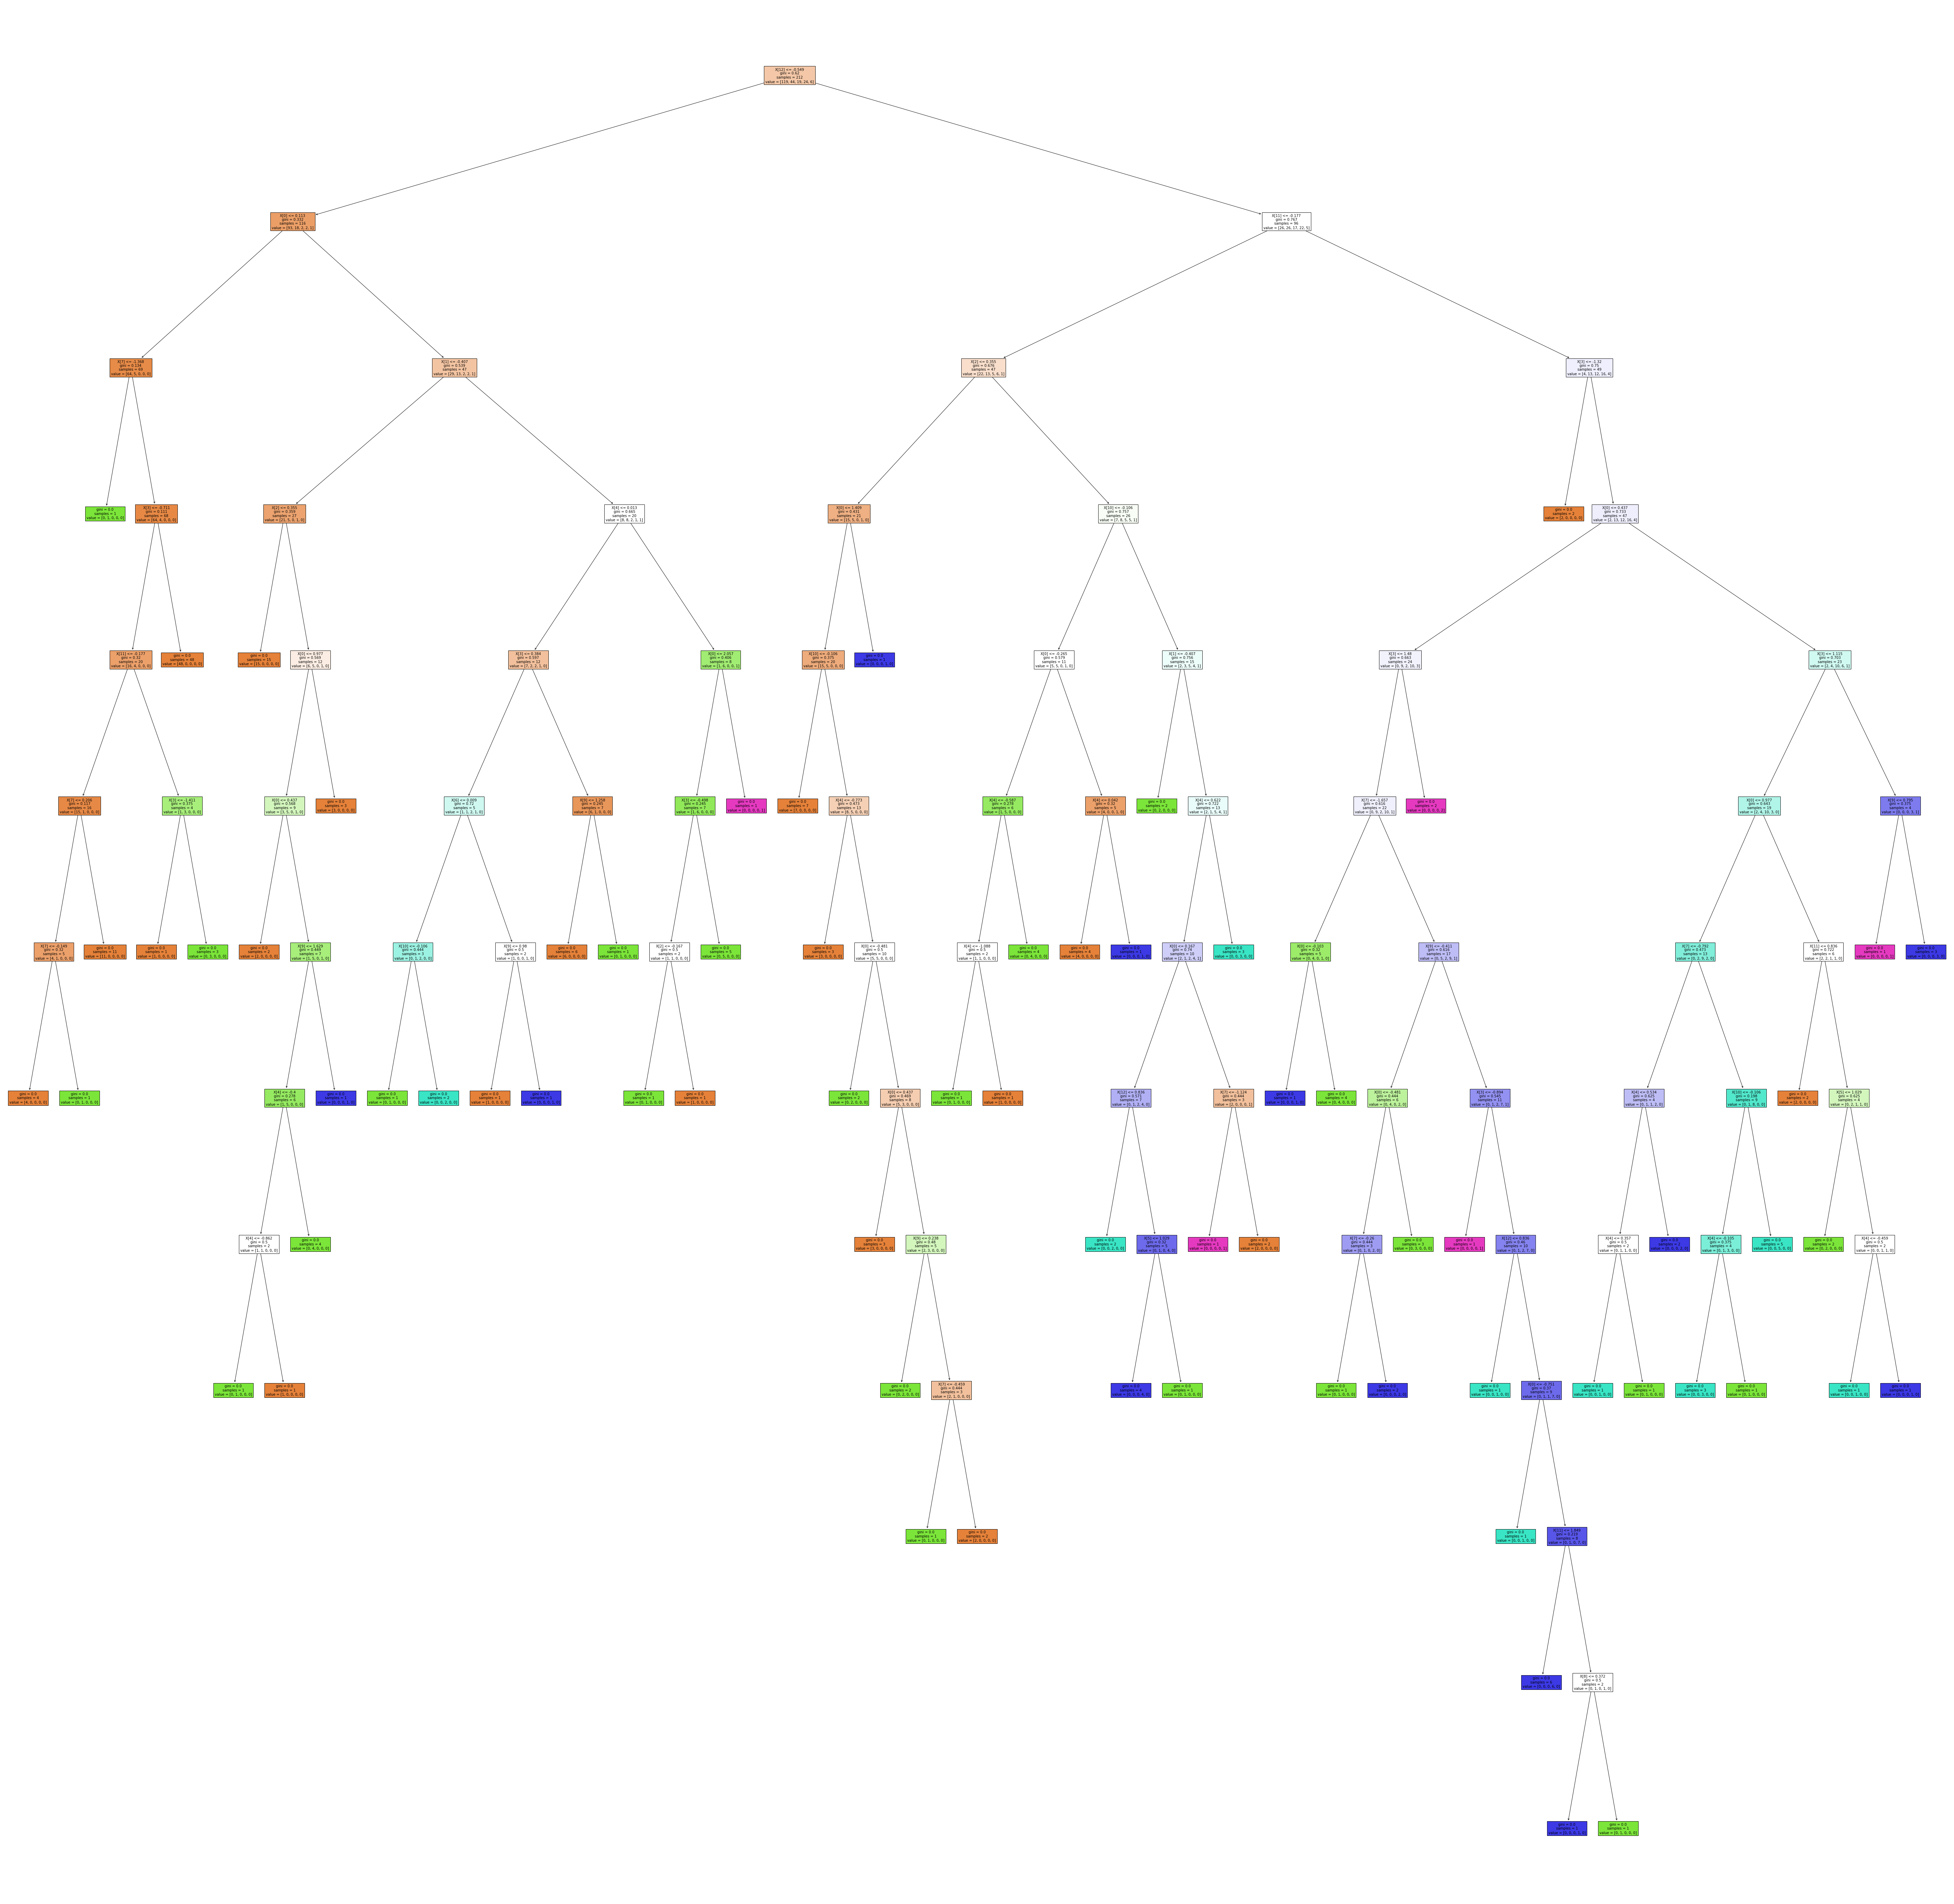

In [42]:
plt.figure(figsize=(100,100))
tree.plot_tree(tf,filled=True)

In [43]:
print(tree.export_text(tf))

|--- feature_12 <= -0.55
|   |--- feature_0 <= 0.11
|   |   |--- feature_7 <= -1.37
|   |   |   |--- class: 1
|   |   |--- feature_7 >  -1.37
|   |   |   |--- feature_3 <= -0.71
|   |   |   |   |--- feature_11 <= -0.18
|   |   |   |   |   |--- feature_7 <= 0.21
|   |   |   |   |   |   |--- feature_7 <= -0.15
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  -0.15
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  0.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  -0.18
|   |   |   |   |   |--- feature_3 <= -1.41
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  -1.41
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.71
|   |   |   |   |--- class: 0
|   |--- feature_0 >  0.11
|   |   |--- feature_1 <= -0.41
|   |   |   |--- feature_2 <= 0.35
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.35
|   |   |   |   |--- feature_0 <= 0.98
|   |   

In [44]:
dt.feature_importances_

array([0.20633697, 0.03243175, 0.05261346, 0.10417682, 0.12134918,
       0.02357753, 0.00963383, 0.08344836, 0.00760565, 0.06511249,
       0.03766778, 0.08130879, 0.17473736])

In [45]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [46]:
Y_pred=dt.predict(X_test_std)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [49]:
ac_dt

0.43956043956043955

In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        45
           1       0.08      0.18      0.11        11
           2       0.29      0.12      0.17        17
           3       0.29      0.18      0.22        11
           4       0.11      0.14      0.12         7

    accuracy                           0.44        91
   macro avg       0.31      0.27      0.28        91
weighted avg       0.49      0.44      0.46        91



array([[33, 10,  2,  0,  0],
       [ 4,  2,  2,  2,  1],
       [ 3,  8,  2,  1,  3],
       [ 2,  3,  0,  2,  4],
       [ 0,  3,  1,  2,  1]], dtype=int64)

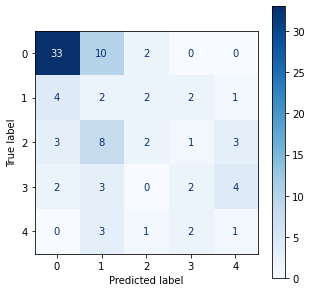

In [51]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(tf,X_test_std,Y_test,cmap='Blues',values_format ='.3g')
disp.confusion_matrix

# SVM

In [52]:
from sklearn.svm import SVC

In [53]:
sv=SVC()

In [54]:
sv.fit(X_train_std,Y_train)

SVC()

In [55]:
Y_pred=sv.predict(X_test_std)

In [56]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [57]:
ac_sv

0.5384615384615384

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82        45
           1       0.14      0.27      0.18        11
           2       0.00      0.00      0.00        17
           3       0.33      0.27      0.30        11
           4       0.00      0.00      0.00         7

    accuracy                           0.54        91
   macro avg       0.24      0.30      0.26        91
weighted avg       0.41      0.54      0.46        91



C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[43,  0,  0,  2,  0],
       [ 7,  3,  0,  1,  0],
       [ 6, 10,  0,  1,  0],
       [ 3,  5,  0,  3,  0],
       [ 1,  4,  0,  2,  0]], dtype=int64)

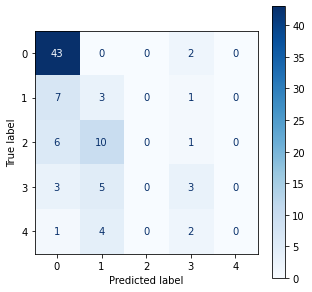

In [59]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(sv,X_test_std,Y_test,cmap='Blues',values_format ='.3g')
disp.confusion_matrix

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [61]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [62]:
X_train_std

array([[-0.15741061,  0.6723502 , -0.1674166 , ...,  2.30461805,
        -0.68338185, -0.89523364],
       [-0.15741061,  0.6723502 ,  0.87647516, ..., -0.90971765,
        -0.68338185,  1.18275393],
       [-0.15741061,  0.6723502 ,  0.87647516, ...,  0.6974502 ,
         1.34286924,  1.18275393],
       ...,
       [ 0.27457709,  0.6723502 , -0.1674166 , ..., -0.90971765,
        -0.68338185, -0.89523364],
       [-1.02138602, -1.48732014, -1.21130837, ...,  0.6974502 ,
        -0.68338185, -0.89523364],
       [-1.34537679,  0.6723502 ,  0.87647516, ...,  0.6974502 ,
        -0.68338185,  0.49009141]])

In [63]:
Y_pred=knn.predict(X_test_std)

In [64]:
Y_pred

array([0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 0, 3, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [65]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [66]:
ac_knn

0.5274725274725275

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        45
           1       0.13      0.27      0.18        11
           2       0.43      0.18      0.25        17
           3       0.14      0.09      0.11        11
           4       0.00      0.00      0.00         7

    accuracy                           0.53        91
   macro avg       0.29      0.29      0.27        91
weighted avg       0.49      0.53      0.49        91



C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[41,  2,  1,  1,  0],
       [ 7,  3,  1,  0,  0],
       [ 2,  9,  3,  3,  0],
       [ 2,  6,  2,  1,  0],
       [ 2,  3,  0,  2,  0]], dtype=int64)

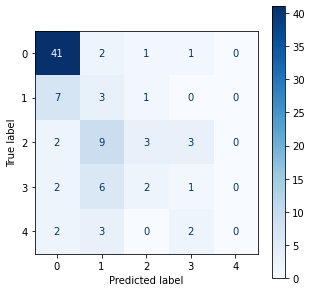

In [68]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn,X_test_std,Y_test,cmap='Blues',values_format ='.3g')
disp.confusion_matrix

# RANDOM FOREST

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [70]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [71]:
Y_pred=rf.predict(X_test_std)

In [72]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [73]:
ac_rf

0.5824175824175825

In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        45
           1       0.07      0.09      0.08        11
           2       0.55      0.35      0.43        17
           3       0.50      0.45      0.48        11
           4       0.00      0.00      0.00         7

    accuracy                           0.58        91
   macro avg       0.37      0.36      0.36        91
weighted avg       0.54      0.58      0.55        91



C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[41,  3,  1,  0,  0],
       [ 7,  1,  2,  1,  0],
       [ 5,  3,  6,  3,  0],
       [ 1,  4,  1,  5,  0],
       [ 1,  4,  1,  1,  0]], dtype=int64)

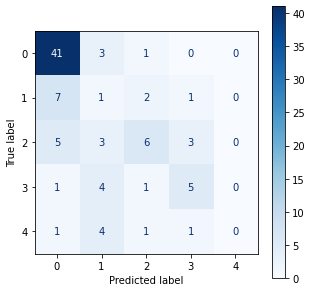

In [75]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(rf,X_test_std,Y_test,cmap='Blues',values_format ='.3g')
disp.confusion_matrix

# LOGISTIC REGRESSION

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression()

In [77]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [78]:
Y_pred_lr=lr.predict(X_test_std)

In [79]:
Y_pred_lr

array([0, 3, 1, 3, 0, 4, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 1, 0, 3, 0, 0, 0,
       1, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 4, 3, 0, 0, 3, 4, 0, 0, 3, 0, 0, 3, 0,
       0, 4, 1, 1, 0, 0, 0, 3, 0, 3, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4], dtype=int64)

In [80]:
Y_test

246    2
183    0
229    2
126    3
184    1
      ..
69     1
21     0
210    0
78     0
174    4
Name: num, Length: 91, dtype: int64

In [81]:
confusion_matrix(Y_test,Y_pred)

array([[41,  3,  1,  0,  0],
       [ 7,  1,  2,  1,  0],
       [ 5,  3,  6,  3,  0],
       [ 1,  4,  1,  5,  0],
       [ 1,  4,  1,  1,  0]], dtype=int64)

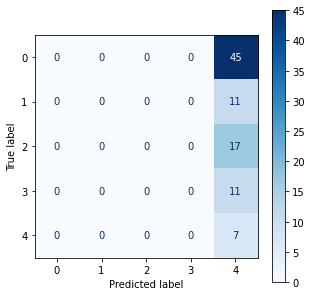

In [82]:
from sklearn.metrics import plot_confusion_matrix
disp=plot_confusion_matrix(lr,X_test,Y_test,cmap='Blues',values_format='.3g')

In [83]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [84]:
ac_lr

0.5604395604395604

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        45
           1       0.07      0.09      0.08        11
           2       0.55      0.35      0.43        17
           3       0.50      0.45      0.48        11
           4       0.00      0.00      0.00         7

    accuracy                           0.58        91
   macro avg       0.37      0.36      0.36        91
weighted avg       0.54      0.58      0.55        91



C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sloga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


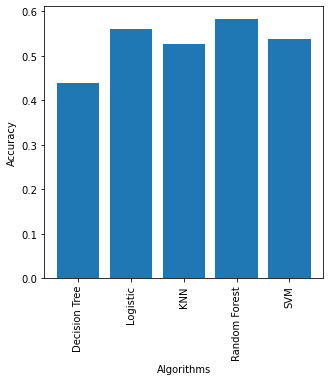

In [86]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)

plt.show()